In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium

In [2]:
df_rwanda = pd.read_csv('./data/rwanda.csv')

In [3]:
df_rwanda.head()

,cluster,latitude,longitude,wealth_index,mean_light,median_light,std_light,min_light,max_light
0,1,-2.532818,29.684726,-0.531405,0.06,0.0,0.596992,0.0,6.0
1,2,-1.833858,30.310689,-0.409830,0.00,0.0,0.000000,0.0,0.0
2,3,-1.888155,29.478298,-0.478115,0.00,0.0,0.000000,0.0,0.0
3,4,-2.366763,30.521692,-0.435960,0.00,0.0,0.000000,0.0,0.0
4,5,-2.171266,30.018541,-0.449480,0.00,0.0,0.000000,0.0,0.0


In [77]:
center_x, center_y = df_rwanda['latitude'].median(), df_rwanda['longitude'].median()
def generateBaseMap(default_location=[40.693943, -73.985880], default_zoom_start=12):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map
base_map = generateBaseMap([center_x, center_y], 9)
folium.plugins.HeatMap(data=df_rwanda[['latitude', 'longitude', 'wealth_index']].groupby(['latitude', 'longitude']).sum().reset_index().values.tolist(), radius=10, max_zoom=13).add_to(base_map)
base_map

In [78]:
base_map = generateBaseMap([center_x, center_y], 9)
folium.plugins.HeatMap(data=df_rwanda[['latitude', 'longitude', 'median_light']].groupby(['latitude', 'longitude']).sum().reset_index().values.tolist(), radius=10, max_zoom=13).add_to(base_map)
base_map

In [21]:
df_rwanda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 9 columns):
cluster         492 non-null int64
latitude        492 non-null float64
longitude       492 non-null float64
wealth_index    492 non-null float64
mean_light      492 non-null float64
median_light    492 non-null float64
std_light       492 non-null float64
min_light       492 non-null float64
max_light       492 non-null float64
dtypes: float64(8), int64(1)
memory usage: 34.7 KB


In [22]:
df_rwanda.describe()

,cluster,latitude,longitude,wealth_index,mean_light,median_light,std_light,min_light,max_light
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000
mean,246.500000,-2.008512,29.853829,-0.076692,3.712439,3.289634,2.396116,0.546748,8.538618
std,142.172431,0.357658,0.412941,0.856169,10.139995,10.068349,5.431624,2.133013,18.695342
min,1.000000,-2.800865,28.903892,-1.059280,0.000000,0.000000,0.000000,0.000000,0.000000
25%,123.750000,-2.260595,29.571452,-0.460579,0.000000,0.000000,0.000000,0.000000,0.000000
50%,246.500000,-1.974623,29.820861,-0.373862,0.000000,0.000000,0.000000,0.000000,0.000000
75%,369.250000,-1.732279,30.118193,-0.213759,0.300000,0.000000,1.307670,0.000000,6.250000
max,492.000000,-1.099347,30.850353,4.463920,47.300000,50.000000,20.612142,19.000000,62.000000


- Country : Rwanda
- Number of observations : 492
- For each observation, we have the geographical coordinates, the wealth index and the nightlight activity (mean, median, std, min, max)
- Nightlight variable : integer between 0 and 62 giving the intensity (62 is high and 0 is low)
- Wealth variable : DHS official wealth index, calculated weirdly, can be negative

(               cluster  latitude  longitude  wealth_index  mean_light  \
 cluster       1.000000 -0.026962  -0.018165     -0.033581   -0.016677   
 latitude     -0.026962  1.000000   0.236445      0.098101    0.047606   
 longitude    -0.018165  0.236445   1.000000      0.201621    0.160928   
 wealth_index -0.033581  0.098101   0.201621      1.000000    0.860798   
 mean_light   -0.016677  0.047606   0.160928      0.860798    1.000000   
 median_light -0.026984  0.045498   0.159276      0.819527    0.985031   
 std_light    -0.004575  0.040473   0.145144      0.870896    0.951686   
 min_light    -0.028090  0.037607   0.136533      0.676300    0.876554   
 max_light    -0.007353  0.036415   0.137189      0.867545    0.954745   
 
               median_light  std_light  min_light  max_light  
 cluster          -0.026984  -0.004575  -0.028090  -0.007353  
 latitude          0.045498   0.040473   0.037607   0.036415  
 longitude         0.159276   0.145144   0.136533   0.137189  
 wealt

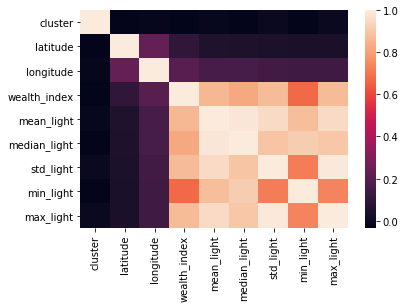

In [62]:
corr = df_rwanda.corr()sns.heatmap(corr)

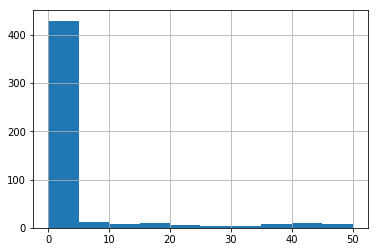

In [63]:
df_rwanda['median_light'].hist(bins=10)

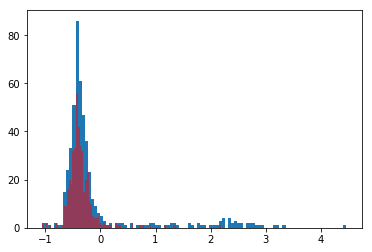

In [71]:
fig = plt.figure()
ax = fig.add_subplot(111)
_ = ax.hist(df_rwanda['wealth_index'], bins=100)
_ = ax.hist(df_rwanda.loc[df_rwanda['median_light'] == 0]['wealth_index'], color='red', alpha=0.5, bins=100)

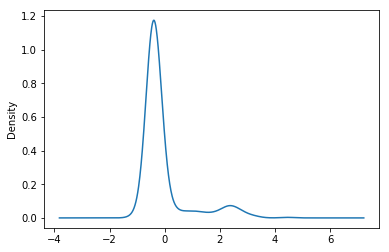

In [73]:
fig = plt.figure()
ax = fig.add_subplot(111)
df_rwanda['wealth_index'].plot(kind='kde', ax=ax)
#df_rwanda.loc[df_rwanda['median_light'] == 0]['wealth_index'].plot(kind='kde', ax=ax, color='red')

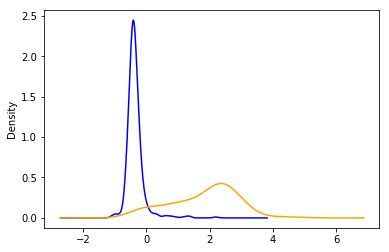

In [98]:
fig = plt.figure()
ax = fig.add_subplot(111)
df_rwanda.loc[df_rwanda['mean_light'] < 4]['wealth_index'].plot(kind='kde', ax=ax, color='blue')
df_rwanda.loc[df_rwanda['mean_light'] >= 4]['wealth_index'].plot(kind='kde', ax=ax, color='orange')

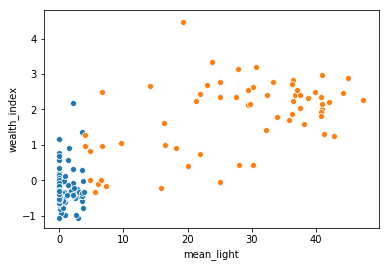

In [97]:
sns.scatterplot(x='mean_light', y='wealth_index', data=df_rwanda.loc[df_rwanda['mean_light'] < 4])
sns.scatterplot(x='mean_light', y='wealth_index', data=df_rwanda.loc[df_rwanda['mean_light'] >= 4])